# Cap. 9 - Pandas



## Indexação avançada

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Em alguns casos pode útil criar uma estrutura hierárquica para ser usada como índice do panda. Para isso, podemos usar o `pd.MultiIndex.from_tuples`, como no exemplo a abaixo:

In [ ]:
cities = ('Paris', 'Berlin', 'Vienna', 'London', 'Madrid')
months = ('Jan', 'Apr', 'Jul', 'Oct')

In [ ]:
index = pd.MultiIndex.from_tuples((city, month) for city in cities for month in months)

In [ ]:
index

MultiIndex([( 'Paris', 'Jan'),
            ( 'Paris', 'Apr'),
            ( 'Paris', 'Jul'),
            ( 'Paris', 'Oct'),
            ('Berlin', 'Jan'),
            ('Berlin', 'Apr'),
            ('Berlin', 'Jul'),
            ('Berlin', 'Oct'),
            ('Vienna', 'Jan'),
            ('Vienna', 'Apr'),
            ('Vienna', 'Jul'),
            ('Vienna', 'Oct'),
            ('London', 'Jan'),
            ('London', 'Apr'),
            ('London', 'Jul'),
            ('London', 'Oct'),
            ('Madrid', 'Jan'),
            ('Madrid', 'Apr'),
            ('Madrid', 'Jul'),
            ('Madrid', 'Oct')],
           )

Outra maneira de criar esses índices é usando `pd.MultiIndex.from_product`:

In [ ]:
index = pd.MultiIndex.from_product((cities, months))

In [ ]:
index

MultiIndex([( 'Paris', 'Jan'),
            ( 'Paris', 'Apr'),
            ( 'Paris', 'Jul'),
            ( 'Paris', 'Oct'),
            ('Berlin', 'Jan'),
            ('Berlin', 'Apr'),
            ('Berlin', 'Jul'),
            ('Berlin', 'Oct'),
            ('Vienna', 'Jan'),
            ('Vienna', 'Apr'),
            ('Vienna', 'Jul'),
            ('Vienna', 'Oct'),
            ('London', 'Jan'),
            ('London', 'Apr'),
            ('London', 'Jul'),
            ('London', 'Oct'),
            ('Madrid', 'Jan'),
            ('Madrid', 'Apr'),
            ('Madrid', 'Jul'),
            ('Madrid', 'Oct')],
           )

Usando esse índice, podemos criar um DataFrame:

In [ ]:
index.names = ['City', 'Month']

In [ ]:
#cada lista da lista representa a temperatura nos meses em cada cidade
temps = [[4.9, 11.5, 20.5, 13.0], [0.1, 9.0, 19.1, 9.4],
         [0.3, 10.7, 20.8, 10.2], [5.2, 9.9, 18.7, 12.0],
         [6.3, 12.9, 25.6, 15.1]]

#cada lista da lista representa a quantidade de chuva nos meses em cada cidade
rainfall = [[51.0, 51.8, 62.3, 61.5], [37.2, 33.7, 52.5, 32.2],
            [38., 45., 70., 38.], [55.2, 43.7, 44.5, 68.5],
            [33., 45., 12., 60.]]

In [ ]:
arr = np.array((temps, rainfall)).reshape((2 , 20)).T
arr

array([[ 4.9, 51. ],
       [11.5, 51.8],
       [20.5, 62.3],
       [13. , 61.5],
       [ 0.1, 37.2],
       [ 9. , 33.7],
       [19.1, 52.5],
       [ 9.4, 32.2],
       [ 0.3, 38. ],
       [10.7, 45. ],
       [20.8, 70. ],
       [10.2, 38. ],
       [ 5.2, 55.2],
       [ 9.9, 43.7],
       [18.7, 44.5],
       [12. , 68.5],
       [ 6.3, 33. ],
       [12.9, 45. ],
       [25.6, 12. ],
       [15.1, 60. ]])

In [ ]:
df = pd.DataFrame(arr, index=index, columns =['Mean temperature /degC',
                   'Mean rainfall /mm'])

In [ ]:
df

Mean temperature /degC  Mean rainfall /mm
City   Month                                           
Paris  Jan                       4.9               51.0
       Apr                      11.5               51.8
       Jul                      20.5               62.3
       Oct                      13.0               61.5
Berlin Jan                       0.1               37.2
       Apr                       9.0               33.7
       Jul                      19.1               52.5
       Oct                       9.4               32.2
Vienna Jan                       0.3               38.0
       Apr                      10.7               45.0
       Jul                      20.8               70.0
       Oct                      10.2               38.0
London Jan                       5.2               55.2
       Apr                       9.9               43.7
       Jul                      18.7               44.5
       Oct                      12.0               68.5
Madrid Jan                       6.3               33.0
       Apr                      12.9               45.0
       Jul                      25.6               12.0
       Oct                      15.1               60.0

In [ ]:
#um df
df.loc['Paris']

,Mean temperature /degC,Mean rainfall /mm
Month,,
Jan,4.9,51.0
Apr,11.5,51.8
Jul,20.5,62.3
Oct,13.0,61.5


In [ ]:
#uma série
df.loc[('Paris', 'Jul')]

Mean temperature /degC    20.5
Mean rainfall /mm         62.3
Name: (Paris, Jul), dtype: float64

In [ ]:
#um valor
df.loc[('Paris', 'Jul'), 'Mean rainfall /mm']

62.3

In [ ]:
#não funciona. é preciso ordenar o índice primeiro
df['Berlin':'London']

UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df['Berlin':'London']

Mean temperature /degC  Mean rainfall /mm
City   Month                                           
Berlin Apr                       9.0               33.7
       Jan                       0.1               37.2
       Jul                      19.1               52.5
       Oct                       9.4               32.2
London Apr                       9.9               43.7
       Jan                       5.2               55.2
       Jul                      18.7               44.5
       Oct                      12.0               68.5

Note que os meses também foram ordenados em ordem alfabética, o que pode não ser conveniente.

In [ ]:
#podemos renomear e ordenar novamente
df2 = df.rename({'Jan': 1, 'Apr': 4, 'Jul': 7, 'Oct': 10})
df2.sort_index(inplace=True)

In [ ]:
df2

Mean temperature /degC  Mean rainfall /mm
City   Month                                           
Berlin 1                         0.1               37.2
       4                         9.0               33.7
       7                        19.1               52.5
       10                        9.4               32.2
London 1                         5.2               55.2
       4                         9.9               43.7
       7                        18.7               44.5
       10                       12.0               68.5
Madrid 1                         6.3               33.0
       4                        12.9               45.0
       7                        25.6               12.0
       10                       15.1               60.0
Paris  1                         4.9               51.0
       4                        11.5               51.8
       7                        20.5               62.3
       10                       13.0               61.5
Vienna 1                         0.3               38.0
       4                        10.7               45.0
       7                        20.8               70.0
       10                       10.2               38.0

Podemos usar a função `xs` para selecionar dados nos diferentes níveis de um `MultiIndex`:

In [ ]:
df

Mean temperature /degC  Mean rainfall /mm
City   Month                                           
Berlin Apr                       9.0               33.7
       Jan                       0.1               37.2
       Jul                      19.1               52.5
       Oct                       9.4               32.2
London Apr                       9.9               43.7
       Jan                       5.2               55.2
       Jul                      18.7               44.5
       Oct                      12.0               68.5
Madrid Apr                      12.9               45.0
       Jan                       6.3               33.0
       Jul                      25.6               12.0
       Oct                      15.1               60.0
Paris  Apr                      11.5               51.8
       Jan                       4.9               51.0
       Jul                      20.5               62.3
       Oct                      13.0               61.5
Vienna Apr                      10.7               45.0
       Jan                       0.3               38.0
       Jul                      20.8               70.0
       Oct                      10.2               38.0

In [ ]:
#todos os Janeiros das cidades
df.xs('Jan', level=1)

,Mean temperature /degC,Mean rainfall /mm
City,,
Berlin,0.1,37.2
London,5.2,55.2
Madrid,6.3,33.0
Paris,4.9,51.0
Vienna,0.3,38.0


Finalmente, podemos converter esse Dataframe com multiindex num comum usando o `.unstack()`:

In [ ]:
#o nível 1 vira colunas o 0 linhas
df.unstack()

Mean temperature /degC                  Mean rainfall /mm              \
Month                     Apr  Jan   Jul   Oct               Apr   Jan   Jul   
City                                                                           
Berlin                    9.0  0.1  19.1   9.4              33.7  37.2  52.5   
London                    9.9  5.2  18.7  12.0              43.7  55.2  44.5   
Madrid                   12.9  6.3  25.6  15.1              45.0  33.0  12.0   
Paris                    11.5  4.9  20.5  13.0              51.8  51.0  62.3   
Vienna                   10.7  0.3  20.8  10.2              45.0  38.0  70.0   

              
Month    Oct  
City          
Berlin  32.2  
London  68.5  
Madrid  60.0  
Paris   61.5  
Vienna  38.0

In [ ]:
#ou com o reset_index()
df.reset_index()

,City,Month,Mean temperature /degC,Mean rainfall /mm
0,Berlin,Apr,9.0,33.7
1,Berlin,Jan,0.1,37.2
2,Berlin,Jul,19.1,52.5
3,Berlin,Oct,9.4,32.2
4,London,Apr,9.9,43.7
5,London,Jan,5.2,55.2
6,London,Jul,18.7,44.5
7,London,Oct,12.0,68.5
8,Madrid,Apr,12.9,45.0
9,Madrid,Jan,6.3,33.0


## Intervalos de tempo e séries temporais

O pandas tem várias ferramentas para se lidar com datas com o objeto `Timestamp` usado para representar um tempo:

```
12th of March, 2024 -> Timestamp('2024-03-12 00:00:00')
```

Para criar esse objetos usamos o `.to_datetime':

In [ ]:
#ano, mês, dia
pd.to_datetime('2024-03-12')

Timestamp('2024-03-12 00:00:00')

In [ ]:
#usa o padrão americano mês, dia ano
pd.to_datetime('3/12/24')

Timestamp('2024-03-12 00:00:00')

In [ ]:
#podemos mudar
pd.to_datetime('12/3/24',dayfirst=True)

Timestamp('2024-03-12 00:00:00')

Também é capaz de lidar com formas mais complexas:

In [ ]:
pd.to_datetime('12 March, 2024')

Timestamp('2024-03-12 00:00:00')

In [ ]:
pd.to_datetime('12th of March 2024')

Timestamp('2024-03-12 00:00:00')

In [ ]:
pd.to_datetime('Mar 12, 2024')

Timestamp('2024-03-12 00:00:00')

In [ ]:
pd.to_datetime('2024 Mar 12')

Timestamp('2024-03-12 00:00:00')

Datas com horários também funcionam:

In [ ]:
pd.to_datetime('9:05 21 August 2017')

Timestamp('2017-08-21 09:05:00')

In [ ]:
pd.to_datetime('21 August 2017 09:05:23')

Timestamp('2017-08-21 09:05:23')

Também podemos criar intervalos de datas:

In [ ]:
pd.date_range('1997-03-12', '1997-03-15')

DatetimeIndex(['1997-03-12', '1997-03-13', '1997-03-14', '1997-03-15'], dtype='datetime64[ns]', freq='D')

In [ ]:
#periods=4 -> 4 dias a partir da data
pd.date_range('1997-03-12',periods=4)

DatetimeIndex(['1997-03-12', '1997-03-13', '1997-03-14', '1997-03-15'], dtype='datetime64[ns]', freq='D')

In [ ]:
#4 meses
pd.date_range ('1997-03', periods=4, freq='M')

DatetimeIndex(['1997-03-31', '1997-04-30', '1997-05-31', '1997-06-30'], dtype='datetime64[ns]', freq='M')

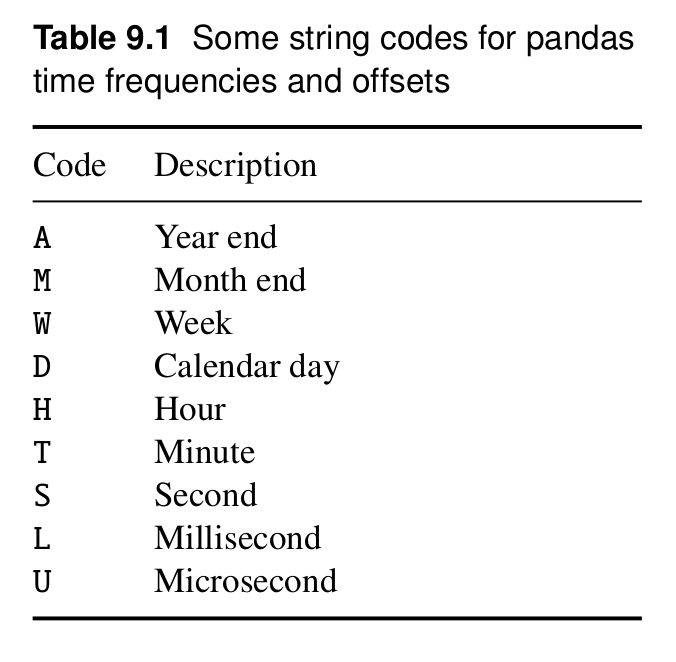

In [ ]:
#4 meses
pd.date_range('1997-03', periods=4, freq='A')

DatetimeIndex(['1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31'], dtype='datetime64[ns]', freq='A-DEC')

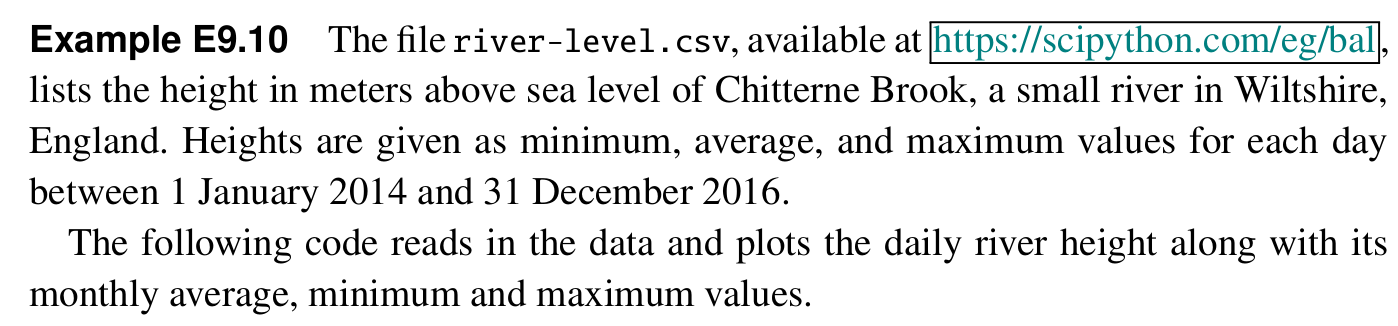

In [ ]:
!wget -c https://scipython.com/static/media/2/examples/E9/river-level.csv

--2024-03-12 22:56:44--  https://scipython.com/static/media/2/examples/E9/river-level.csv
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
df = pd.read_csv('river-level.csv', index_col=0, comment='#', parse_dates=True)
df

,min_level,avg_level,max_level
date,,,
2014-01-01,0.24,0.32,0.42
2014-01-02,0.42,0.46,0.49
2014-01-03,0.50,0.52,0.58
2014-01-04,0.60,0.69,0.72
2014-01-05,0.73,0.88,0.99
...,...,...,...
2016-12-27,0.05,0.05,0.05
2016-12-28,0.05,0.05,0.05
2016-12-29,0.05,0.05,0.05


In [ ]:
?df.resample

In [ ]:
rs_monthly = df.resample('M')

In [ ]:
#média mensal
rs_monthly.mean().head()

,min_level,avg_level,max_level
date,,,
2014-01-31,0.877419,0.900645,0.922258
2014-02-28,0.815000,0.825357,0.832500
2014-03-31,0.432258,0.445484,0.459677
2014-04-30,0.168000,0.168667,0.169000
2014-05-31,0.158710,0.159032,0.159355


In [ ]:
#mínimo mensal
rs_monthly.min().head()

,min_level,avg_level,max_level
date,,,
2014-01-31,0.24,0.32,0.42
2014-02-28,0.67,0.68,0.69
2014-03-31,0.21,0.21,0.21
2014-04-30,0.14,0.14,0.14
2014-05-31,0.14,0.14,0.14


In [ ]:
#máximo mensal
rs_monthly.max().head()

,min_level,avg_level,max_level
date,,,
2014-01-31,1.35,1.35,1.35
2014-02-28,0.95,0.96,1.02
2014-03-31,1.18,1.18,1.18
2014-04-30,0.21,0.21,0.21
2014-05-31,0.17,0.17,0.17


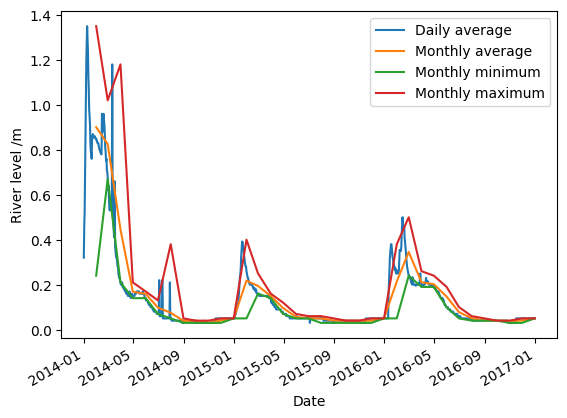

In [ ]:
df['avg_level'].plot(label='Daily average')
rs_monthly['avg_level'].mean().plot(label='Monthly average')
rs_monthly['min_level'].min().plot(label='Monthly minimum')
rs_monthly['max_level'].max().plot(label='Monthly maximum')

plt.xlabel('Date')
plt.ylabel('River level /m')
plt.legend()

## Limpando dados

In [ ]:
df = pd.DataFrame ([[1.1,    np.nan, np.nan, 10.3],
                    [0.8,    np.nan,    3.6,  2.9],
                    [1.2,       2.5,    1.6,  2.7],
                    [np.nan, np.nan, np.nan, np.nan],
                    [np.nan, np.nan,    3.6,    5.3]],
                    columns=list('ABCD'))

In [ ]:
df

,A,B,C,D
0,1.1,NaN,NaN,10.3
1,0.8,NaN,3.6,2.9
2,1.2,2.5,1.6,2.7
3,NaN,NaN,NaN,NaN
4,NaN,NaN,3.6,5.3


In [ ]:
#remove a linha se qualquer coluna tiver um nan
df.dropna()

,A,B,C,D
2,1.2,2.5,1.6,2.7


In [ ]:
#remove a linha se todas as colunas forem nans
df.dropna(how='all')

,A,B,C,D
0,1.1,NaN,NaN,10.3
1,0.8,NaN,3.6,2.9
2,1.2,2.5,1.6,2.7
4,NaN,NaN,3.6,5.3


In [ ]:
df

,A,B,C,D
0,1.1,NaN,NaN,10.3
1,0.8,NaN,3.6,2.9
2,1.2,2.5,1.6,2.7
3,NaN,NaN,NaN,NaN
4,NaN,NaN,3.6,5.3


In [ ]:
#remove as colunas se as linhas tiverem mais de 3 nans
df.dropna(thresh=3, axis=1)

,A,C,D
0,1.1,NaN,10.3
1,0.8,3.6,2.9
2,1.2,1.6,2.7
3,NaN,NaN,NaN
4,NaN,3.6,5.3


In [ ]:
#preenche nans com um valor
df.fillna(3.6)

,A,B,C,D
0,1.1,3.6,3.6,10.3
1,0.8,3.6,3.6,2.9
2,1.2,2.5,1.6,2.7
3,3.6,3.6,3.6,3.6
4,3.6,3.6,3.6,5.3


In [ ]:
df

,A,B,C,D
0,1.1,NaN,NaN,10.3
1,0.8,NaN,3.6,2.9
2,1.2,2.5,1.6,2.7
3,NaN,NaN,NaN,NaN
4,NaN,NaN,3.6,5.3


In [ ]:
#preenche nans com o ultimo valor válido encontrado ao longo das linhas
df.fillna(method='ffill')

,A,B,C,D
0,1.1,NaN,NaN,10.3
1,0.8,NaN,3.6,2.9
2,1.2,2.5,1.6,2.7
3,1.2,2.5,1.6,2.7
4,1.2,2.5,3.6,5.3


In [ ]:
#preenche nans com o ultimo valor válido encontrado ao longo das colunas
df.fillna(method='ffill', axis=1)

,A,B,C,D
0,1.1,1.1,1.1,10.3
1,0.8,0.8,3.6,2.9
2,1.2,2.5,1.6,2.7
3,NaN,NaN,NaN,NaN
4,NaN,NaN,3.6,5.3


**Removendo valores duplicados**

In [ ]:
df = pd. DataFrame([['Lithium', 'Li', 3, 6, 0.0759],
                    ['Lithium', 'Li', 3, 7, 0.9241],
                    ['Sodium', 'Na', 11, 23, 1],
                    ['Potassium', 'K', 19, 39, 0.932581],
                    ['Potassium', 'K', 19, 40, 1.17e-4],
                    ['Potassium', 'K', 19, 41, 0.067302]],
                    columns=['Element', 'Symbol', 'Z', 'A', 'Abundance'])

In [ ]:
df

,Element,Symbol,Z,A,Abundance
0,Lithium,Li,3,6,0.075900
1,Lithium,Li,3,7,0.924100
2,Sodium,Na,11,23,1.000000
3,Potassium,K,19,39,0.932581
4,Potassium,K,19,40,0.000117
5,Potassium,K,19,41,0.067302


In [ ]:
df.drop_duplicates(['Symbol'])

,Element,Symbol,Z,A,Abundance
0,Lithium,Li,3,6,0.075900
2,Sodium,Na,11,23,1.000000
3,Potassium,K,19,39,0.932581


In [ ]:
df.drop_duplicates(['Symbol', 'Z'], keep='last')

,Element,Symbol,Z,A,Abundance
1,Lithium,Li,3,7,0.924100
2,Sodium,Na,11,23,1.000000
5,Potassium,K,19,41,0.067302


**Binning dados com `pd.cut`**

In [ ]:
marks = [67, 80, 34, 55, 77, 66, 59, 52, 70, 67, 58, 63, 49, 72]
bins = [0, 40, 60, 70, 80, 100]

In [ ]:
dist = pd.cut(marks, bins)
dist

[(60, 70], (70, 80], (0, 40], (40, 60], (70, 80], ..., (60, 70], (40, 60], (60, 70], (40, 60], (70, 80]]
Length: 14
Categories (5, interval[int64, right]): [(0, 40] < (40, 60] < (60, 70] < (70, 80] < (80, 100]]

In [ ]:
pd.value_counts(dist)

(40, 60]     5
(60, 70]     5
(70, 80]     3
(0, 40]      1
(80, 100]    0
dtype: int64

In [ ]:
#intervalo aberto à direita
dist = pd.cut(marks, bins, right=False)
dist

[[60, 70), [80, 100), [0, 40), [40, 60), [70, 80), ..., [60, 70), [40, 60), [60, 70), [40, 60), [70, 80)]
Length: 14
Categories (5, interval[int64, left]): [[0, 40) < [40, 60) < [60, 70) < [70, 80) < [80, 100)]

In [ ]:
pd.value_counts(dist)

[40, 60)     5
[60, 70)     4
[70, 80)     3
[0, 40)      1
[80, 100)    1
dtype: int64

In [ ]:
list(reversed('ABCDE'))

['E', 'D', 'C', 'B', 'A']

In [ ]:
#dando nomes aos bins
dist = pd.cut(marks, bins, labels=list(reversed('ABCDE')), right=False)
dist

['C', 'A', 'E', 'D', 'B', ..., 'C', 'D', 'C', 'D', 'B']
Length: 14
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [ ]:
pd.value_counts(dist)

D    5
C    4
B    3
E    1
A    1
dtype: int64

In [ ]:
pd.value_counts(dist).sort_index(ascending=False)

A    1
B    3
C    4
D    5
E    1
dtype: int64

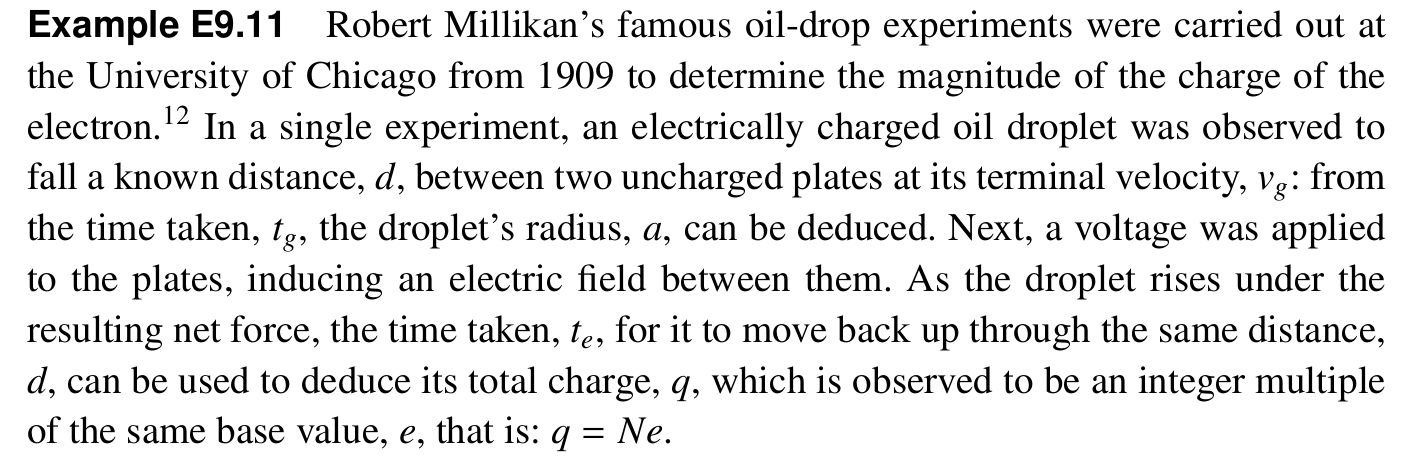

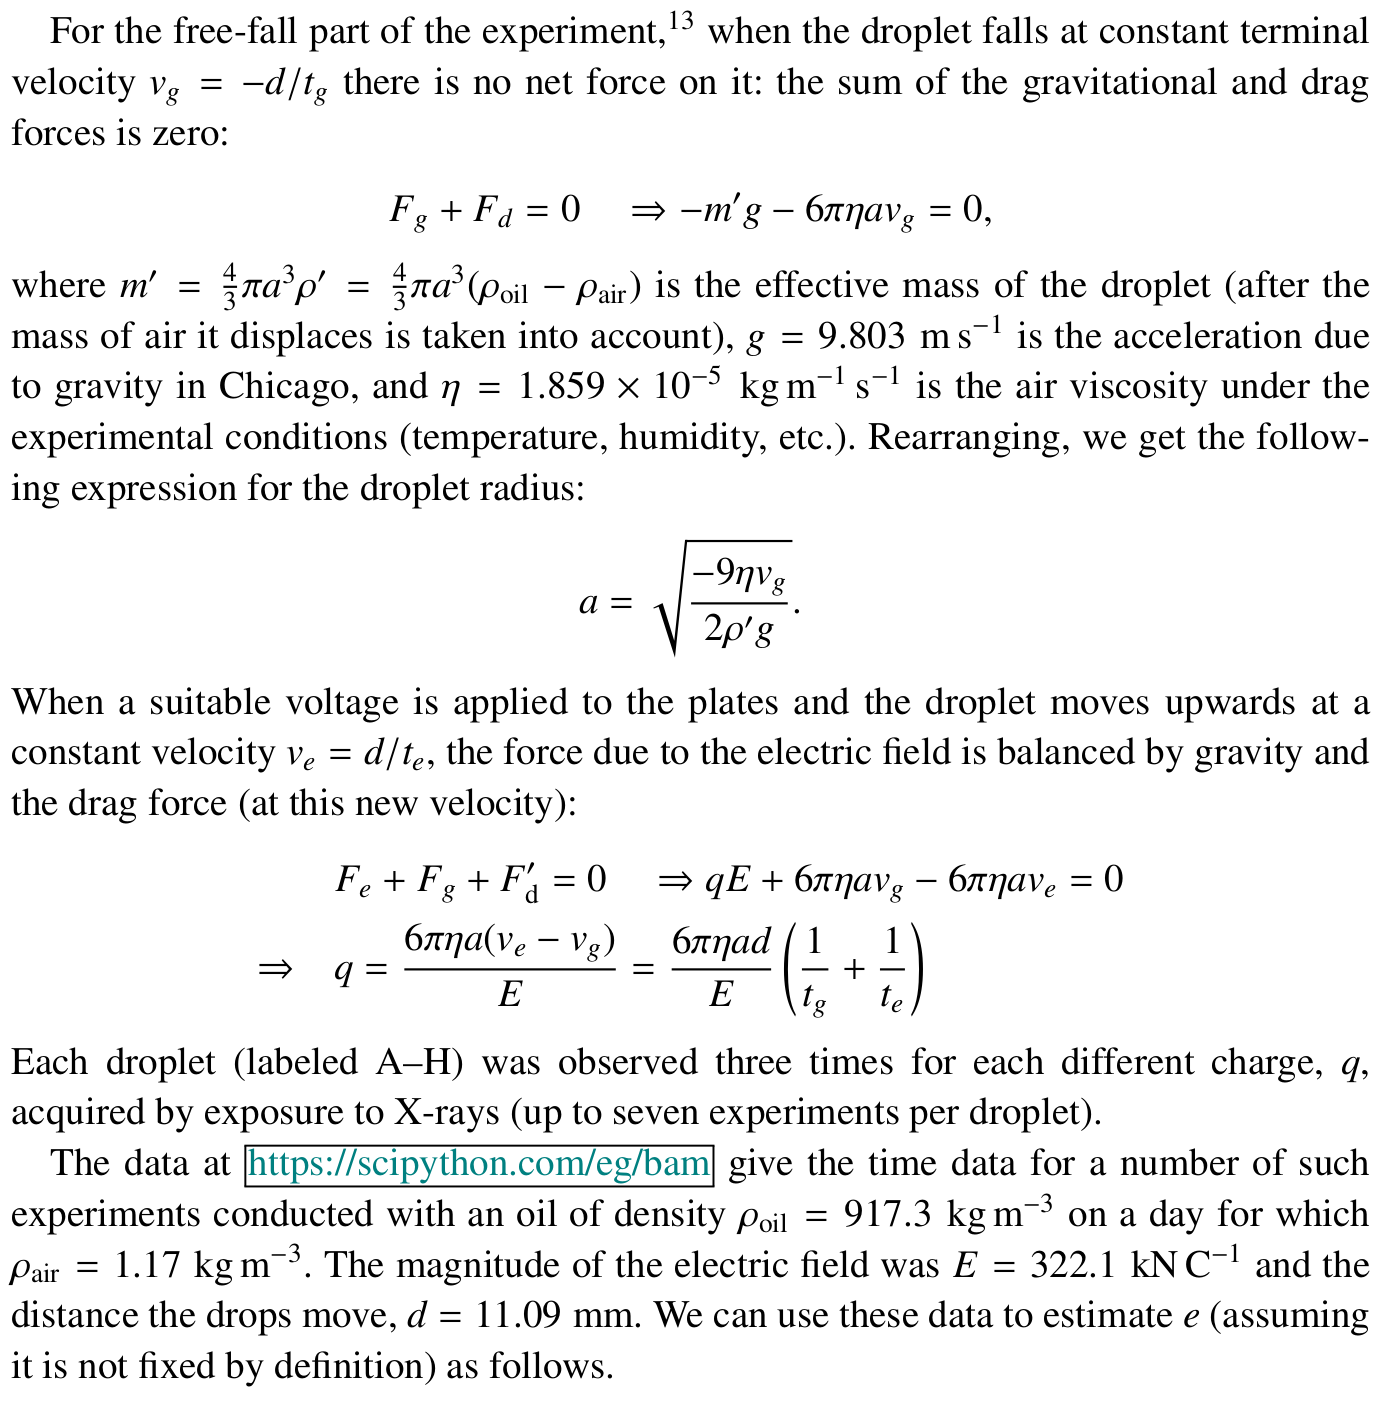

In [ ]:
!wget https://scipython.com/static/media/2/examples/E9/eg10-millikan-data.txt

--2024-03-12 23:16:38--  https://scipython.com/static/media/2/examples/E9/eg10-millikan-data.txt
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2433 (2.4K) [text/plain]
Saving to: ‘eg10-millikan-data.txt.1’

eg10-millikan-data. 100%[===================>]   2.38K  --.-KB/s    in 0s      

2024-03-12 23:16:38 (99.8 MB/s) - ‘eg10-millikan-data.txt.1’ saved [2433/2433]



In [ ]:
eta = 1.859e-5                  # air viscosity, kg.m-1.s-1
rho_air = 1.17                  # air density, kg.m-3
rho_oil = 917.3                 # oil density, kg.m-3
rhop = rho_oil - rho_air
g = 9.803                       # acceleration due to gravity, m.s-2
d = 11.09e-3                    # rise/fall distance, m
E = -322.1e3                    # electric field vector (points down!)

In [ ]:
 df = pd.read_csv('eg10-millikan-data.txt', delim_whitespace=True,
                         index_col=[0, 1])

In [ ]:
df

tg       te    tg.1     te.1    tg.2     te.2
drop expt                                                   
A    1     13.102   46.822  12.941   46.896  13.086   46.681
     2     12.938   86.767  13.032   86.952  13.086   86.746
     3     13.023   61.082  12.958   60.826  12.998   60.860
     4     12.943   86.747  12.922   86.840  13.054   86.899
B    1     11.434   56.305  11.350   56.097  11.246   56.282
     2     11.402   75.823  11.584   75.819  11.487   76.063
     3     11.591   44.717  11.397   44.851  11.364   44.776
     4     11.443   75.905  11.368   75.975  11.457   76.041
     5     11.434   75.939  11.414   75.880  11.444   75.929
     6     11.559   75.892  11.414   75.924  11.292   75.985
     7     11.394   44.716  11.589   44.753  11.401   44.794
C    1     16.197  100.458  16.010  100.486  16.329  100.461
     2     16.241   47.727  16.106   47.714  16.177   47.625
     3     16.133   37.879  16.267   37.746  16.203   37.709
     4     16.170   64.765  16.136   64.649  16.229   64.508
D    1     16.176   38.017  16.127   37.910  16.282   38.020
     2     16.275   38.280  16.092   38.208  16.133   38.092
     3     16.422   48.327  16.073   48.284  16.212   48.184
     4     16.134   38.202  16.258   38.270  16.105   38.229
     5     16.164  102.562  16.217  102.673  16.194  102.696
E    1     12.275   55.020  12.116   54.962  12.307   54.978
     2     12.157   54.772  12.183   54.967  12.046   55.219
     3     12.146   55.004  12.118   54.938  12.346   54.869
     4     12.319   43.635  12.243   43.552  12.073   43.582
F    1     14.172   61.946  14.174   61.970  14.069   61.959
     2     14.145   90.718  13.955   90.707  14.075   90.866
     3     14.070   62.147  14.074   61.961  14.247   61.892
     4     14.017   61.968  14.101   61.921  14.106   62.174
G    1      9.723   50.375   9.527   50.482   9.502   50.508
     2      9.463   63.755   9.670   63.853   9.509   63.827
     3      9.448   63.804   9.407   63.899   9.563   63.768
     4      9.327   63.855   9.518   63.967   9.533   63.824
H    1     13.192   73.375  13.167   73.338  13.316   73.449
     2     13.042   42.642  13.387   42.428  13.334   42.459
     3     13.389   42.379  13.244   42.373  13.055   42.610
     4     13.114   73.161  13.226   73.384  13.207   73.257
     5     13.030   73.295  13.022   73.419  13.438   73.512

In [ ]:
#usando dados de uma única gota
dropA = df.loc['A'].T
dropA

expt,1,2,3,4
tg,13.102,12.938,13.023,12.943
te,46.822,86.767,61.082,86.747
tg.1,12.941,13.032,12.958,12.922
te.1,46.896,86.952,60.826,86.840
tg.2,13.086,13.086,12.998,13.054
te.2,46.681,86.746,60.860,86.899


In [ ]:
#mudar o nome do índice
dropA.index = dropA.index.str.slice(0, 2)
dropA

expt,1,2,3,4
tg,13.102,12.938,13.023,12.943
te,46.822,86.767,61.082,86.747
tg,12.941,13.032,12.958,12.922
te,46.896,86.952,60.826,86.840
tg,13.086,13.086,12.998,13.054
te,46.681,86.746,60.860,86.899


In [ ]:
dropA.loc['tg']

expt,1,2,3,4
tg,13.102,12.938,13.023,12.943
tg,12.941,13.032,12.958,12.922
tg,13.086,13.086,12.998,13.054


In [ ]:
dropA.loc['te']

expt,1,2,3,4
te,46.822,86.767,61.082,86.747
te,46.896,86.952,60.826,86.840
te,46.681,86.746,60.860,86.899


In [ ]:
#o tempo ao cair (sem o campo) deve ser o mesmo
#por isso a média global
tg = dropA.loc['tg'].values.mean()
tg

13.006916666666667

In [ ]:
#o tempo ao subir pode variar entre os experimentos
#devido a possíveis diferenças de cargas
te = dropA.loc['te'].mean()
te

expt
1    46.799667
2    86.821667
3    60.922667
4    86.828667
dtype: float64

In [ ]:
#raio da gota
a = np.sqrt(9*eta*d/tg/2/rhop/g)

In [ ]:
#estimativa da carga da gota em cada experimento
q = 6 * np.pi * eta * a * d / E * (1/tg + 1/te)

In [ ]:
q

expt
1   -3.340563e-18
2   -3.005663e-18
3   -3.172143e-18
4   -3.005631e-18
dtype: float64

In [ ]:
from scipy.constants import elementary_charge
elementary_charge

1.602176634e-19

In [ ]:
q

In [ ]:
-q/elementary_charge

expt
1    20.850156
2    18.759872
3    19.798962
4    18.759675
dtype: float64

In [ ]:
df.index.levels[0]

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype='object', name='drop')

In [ ]:
#repete para cada gota
for drop in df.index.levels[0]:
    drop_df = df.loc[drop].T
    drop_df.index = drop_df.index.str.slice(0, 2)
    tg = drop_df.loc['tg'].values.mean()
    te = drop_df.loc['te'].mean()
    a = np.sqrt(9*eta*d/tg/2/rhop/g)
    q = 6 * np.pi * eta * a * d / E * (1/tg + 1/te)
    df.loc[drop, 'q'] = q.values

In [ ]:
-df['q']/elementary_charge

drop  expt
A     1       20.850156
      2       18.759872
      3       19.798962
      4       18.759675
B     1       23.827578
      2       22.784079
      3       24.856637
      4       22.781253
      5       22.783516
      6       22.782822
      7       24.859687
C     1       13.649932
      2       15.745757
      3       16.792359
      4       14.699514
D     1       16.755607
      2       16.727941
      3       15.688715
      4       16.722688
      5       13.600896
E     1       21.959797
      2       21.959846
      3       21.963401
      4       23.001970
F     1       17.744597
      2       16.700575
      3       17.742387
      4       17.741273
G     1       30.990619
      2       29.961335
      3       29.960604
      4       29.957054
H     1       18.808554
      2       20.892731
      3       20.899226
      4       18.813253
      5       18.807720
Name: q, dtype: float64

Text(0, 0.5, '$\\Delta q$')

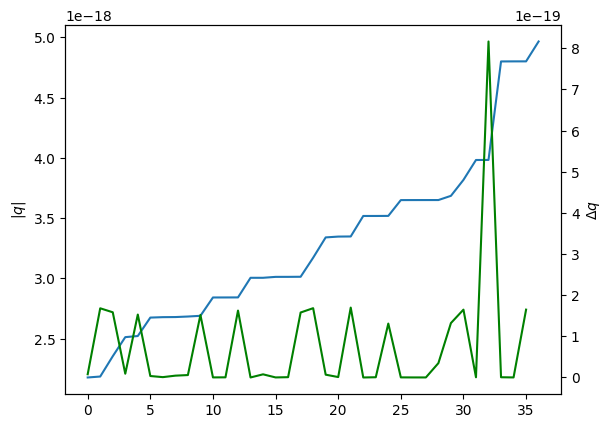

In [ ]:
sorted_q = sorted(-df.loc[:, 'q'])
plt.plot(sorted_q)
plt.ylabel('$|q|$')
plt.twinx()
dq = np.diff(sorted_q)
plt.plot(dq,color='g')
plt.ylabel(r'$\Delta q$')

In [ ]:
elementary_charge

1.602176634e-19

In [ ]:
dq

array([7.85631942e-21, 1.68161570e-19, 1.58487524e-19, 9.13917365e-21,
       1.52978665e-19, 3.54285130e-21, 8.41723914e-22, 4.43253644e-21,
       5.88836024e-21, 1.52032799e-19, 1.78339635e-22, 3.54206376e-22,
       1.62633316e-19, 3.15714563e-23, 7.66614243e-21, 1.33597899e-22,
       7.52937806e-22, 1.57927986e-19, 1.68419790e-19, 6.82127573e-21,
       1.04063458e-21, 1.69922245e-19, 7.74282861e-24, 5.69612405e-22,
       1.31034339e-19, 2.51468544e-22, 1.11149640e-22, 9.02160286e-23,
       3.49099257e-20, 1.32277070e-19, 1.64873369e-19, 4.88599238e-22,
       8.16688327e-19, 5.68732610e-22, 1.17125376e-22, 1.64909388e-19])

In [ ]:
e_estimate = dq[(dq>1.e-19) & (dq<2.e-19)].mean()
df['N'] = (df['q'] / e_estimate).astype(int)

In [ ]:
(df['q']/df['N']).mean(),elementary_charge

(1.5923552150386455e-19, 1.602176634e-19)

In [ ]:
(elementary_charge-(df['q']/df['N']).mean())/(df['q']/df['N']).mean()*100

0.6167856812725087

## Agregando dados

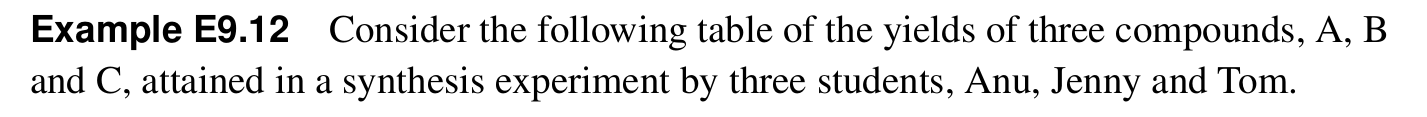

In [ ]:
data = [['Anu', 'A', 5.4], ['Anu', 'B', 6.7], ['Anu', 'C', 10.1],
        ['Jenny', 'A', 6.5], ['Jenny', 'B', 5.9], ['Jenny', 'C', 12.2],
        ['Tom', 'A', 4.0], ['Tom', 'B', None], ['Tom', 'C', 9.5]
       ]
df = pd.DataFrame(data, columns =['Student', 'Compound', 'Yield /g'])
df

,Student,Compound,Yield /g
0,Anu,A,5.4
1,Anu,B,6.7
2,Anu,C,10.1
3,Jenny,A,6.5
4,Jenny,B,5.9
5,Jenny,C,12.2
6,Tom,A,4.0
7,Tom,B,NaN
8,Tom,C,9.5


In [ ]:
grouped = df.groupby('Compound')
grouped

In [ ]:
#numeric_only=True para ignorar nans
grouped.mean(numeric_only=True)

,Yield /g
Compound,
A,5.3
B,6.3
C,10.6


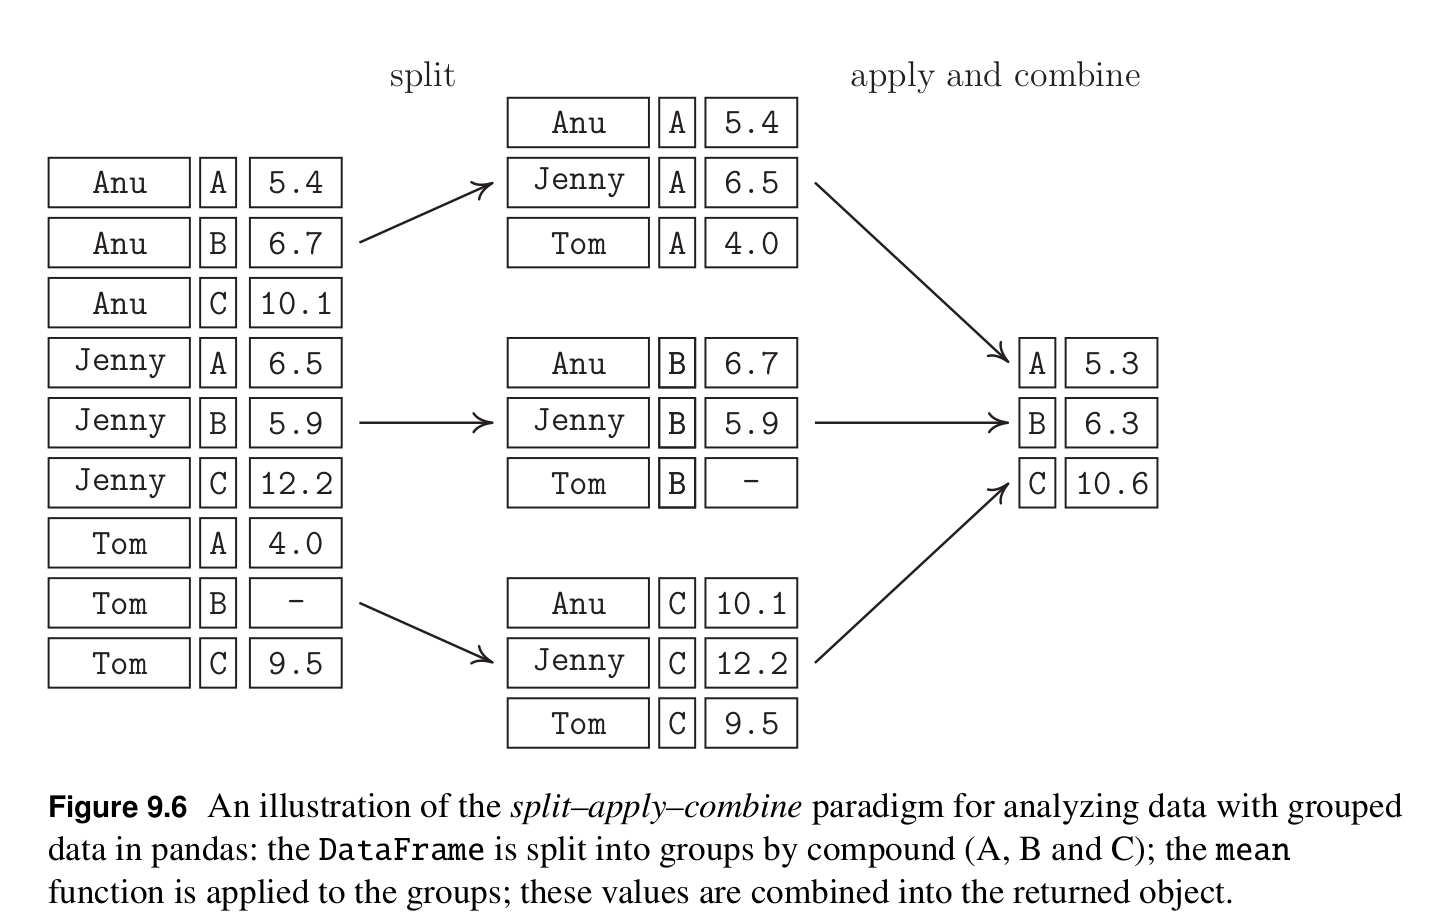

In [ ]:
#numeric_only=True para ignorar nans
grouped.max(numeric_only=True)

,Yield /g
Compound,
A,6.5
B,6.7
C,12.2


In [ ]:
#numeric_only=True para ignorar nans
grouped.min(numeric_only=True)

,Yield /g
Compound,
A,4.0
B,5.9
C,9.5


In [ ]:
#iterando um groupby
for compound, group in grouped:
   print('Compound:', compound)
   print(group)

Compound: A
  Student Compound  Yield /g
0     Anu        A       5.4
3   Jenny        A       6.5
6     Tom        A       4.0
Compound: B
  Student Compound  Yield /g
1     Anu        B       6.7
4   Jenny        B       5.9
7     Tom        B       NaN
Compound: C
  Student Compound  Yield /g
2     Anu        C      10.1
5   Jenny        C      12.2
8     Tom        C       9.5


In [ ]:
grouped = df.groupby('Student')
grouped.mean(numeric_only=True)

,Yield /g
Student,
Anu,7.40
Jenny,8.20
Tom,6.75


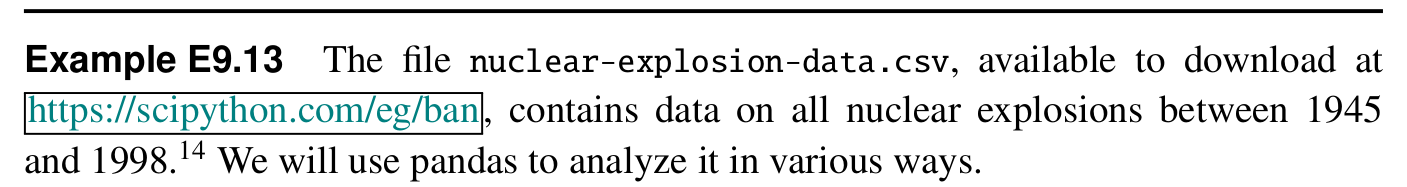

In [ ]:
!wget -c https://scipython.com/static/media/2/examples/E9/nuclear-explosion-data.csv

--2024-03-12 23:34:12--  https://scipython.com/static/media/2/examples/E9/nuclear-explosion-data.csv
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
df = pd.read_csv('nuclear-explosion-data.csv')

In [ ]:
df

,date,time,id,country,region,source,lat,long,mb,Ms,depth,yield_lower,yield_upper,purpose,name,type
0,19450716,123000.0,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER
1,19450805,231500.0,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP
2,19450809,15800.0,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP
3,19460630,220100.0,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP
4,19460724,213500.0,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,19960729,14859.1,96003,CHINA,LOP NOR,HFS,41.69,88.35,5.3,0.0,0.00,3.0,12.0,WR,NaN,UG
2047,19980511,101344.0,98001,INDIA,POKHRAN,HFS,27.07,71.70,5.3,0.0,0.00,0.0,20.0,WR,SHAKTI 1-3,UG
2048,19980513,65100.0,98003,INDIA,POKHRAN,NRD,27.07,71.70,0.0,0.0,0.00,0.0,1.0,WR,NaN,UG
2049,19980528,101617.6,98004,PAKISTAN,CHAGAI,HFS,28.90,64.89,0.0,0.0,0.00,0.0,35.0,WR,NaN,UG


In [ ]:
df.index

RangeIndex(start=0, stop=2051, step=1)

In [ ]:
df.columns

Index(['date', 'time', 'id', 'country', 'region', 'source', 'lat', 'long',
       'mb', 'Ms', 'depth', 'yield_lower', 'yield_upper', 'purpose', 'name',
       'type'],
      dtype='object')

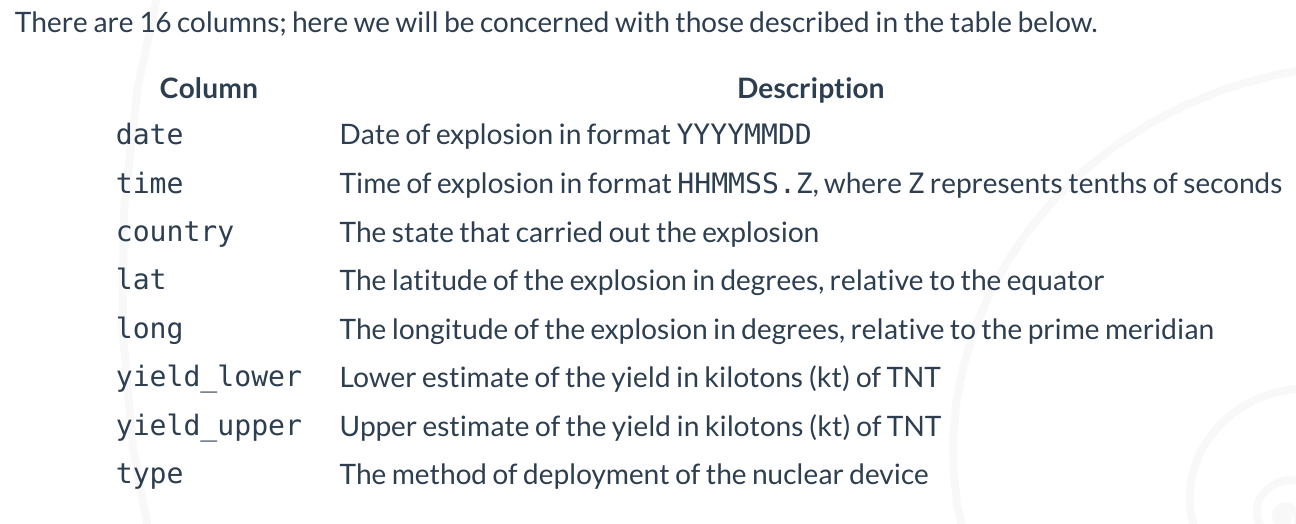

In [ ]:
from datetime import datetime

In [ ]:
def parse_time(t):
    hour, t = divmod(t, 10000)
    minute, t = divmod(t, 100)
    return int(hour), int(minute), int(t)

def parse_datetime(date, time):
    date_and_time = datetime.strptime(str(date), '%Y%m%d')
    hour, minute, second = parse_time(time)
    return date_and_time.replace(hour=hour, minute=minute, second=second)

df.index = pd.DatetimeIndex([parse_datetime(date, time) for date, time in
                    zip(df['date'], df['time'])])
df

,date,time,id,country,region,source,lat,long,mb,Ms,depth,yield_lower,yield_upper,purpose,name,type
1945-07-16 12:30:00,19450716,123000.0,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER
1945-08-05 23:15:00,19450805,231500.0,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP
1945-08-09 01:58:00,19450809,15800.0,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP
1946-06-30 22:01:00,19460630,220100.0,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP
1946-07-24 21:35:00,19460724,213500.0,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996-07-29 01:48:59,19960729,14859.1,96003,CHINA,LOP NOR,HFS,41.69,88.35,5.3,0.0,0.00,3.0,12.0,WR,NaN,UG
1998-05-11 10:13:44,19980511,101344.0,98001,INDIA,POKHRAN,HFS,27.07,71.70,5.3,0.0,0.00,0.0,20.0,WR,SHAKTI 1-3,UG
1998-05-13 06:51:00,19980513,65100.0,98003,INDIA,POKHRAN,NRD,27.07,71.70,0.0,0.0,0.00,0.0,1.0,WR,NaN,UG
1998-05-28 10:16:17,19980528,101617.6,98004,PAKISTAN,CHAGAI,HFS,28.90,64.89,0.0,0.0,0.00,0.0,35.0,WR,NaN,UG


In [ ]:
df.index.year

Int64Index([1945, 1945, 1945, 1946, 1946, 1948, 1948, 1948, 1949, 1951,
            ...
            1995, 1995, 1995, 1996, 1996, 1996, 1998, 1998, 1998, 1998],
           dtype='int64', length=2051)

In [ ]:
 df.groupby(df.index.year).size()

1945      3
1946      2
1948      3
1949      1
1951     18
1952     11
1953     18
1954     16
1955     24
1956     33
1957     55
1958    116
1960      3
1961     71
1962    178
1963     50
1964     60
1965     58
1966     76
1967     64
1968     79
1969     67
1970     64
1971     53
1972     56
1973     48
1974     55
1975     44
1976     51
1977     54
1978     66
1979     58
1980     54
1981     50
1982     49
1983     55
1984     57
1985     36
1986     23
1987     47
1988     40
1989     28
1990     18
1991     14
1992      8
1993      1
1994      2
1995      7
1996      3
1998      4
dtype: int64

In [ ]:
explosion_number = df.groupby(df.index.year).size()

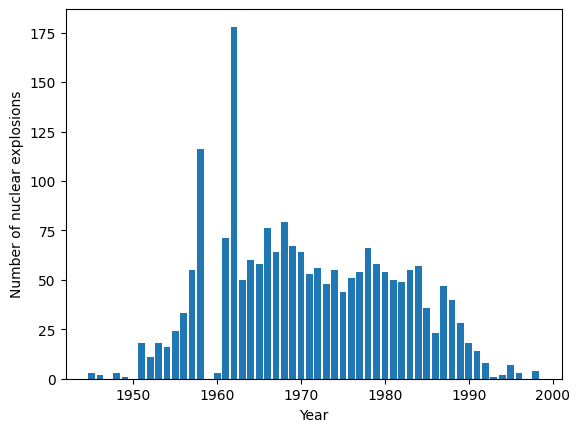

In [ ]:
fig, ax = plt.subplots()
ax.bar(explosion_number.index, explosion_number.values)
ax.set_xlabel('Year')
ax.set_ylabel('Number of nuclear explosions')
plt.show()

In [ ]:
df2 = df.groupby([df.index.year, df.country])
explosions_by_country = df2.size()
explosions_by_country

      country 
1945  USA          3
1946  USA          2
1948  USA          3
1949  USSR         1
1951  USA         16
                  ..
1995  FRANCE       5
1996  CHINA        2
      FRANCE       1
1998  INDIA        2
      PAKISTAN     2
Length: 166, dtype: int64

In [ ]:
explosions_by_country = explosions_by_country.unstack().fillna(0)
explosions_by_country

country,CHINA,FRANCE,INDIA,PAKISTAN,UK,USA,USSR
1945,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1946,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1948,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1949,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1951,0.0,0.0,0.0,0.0,0.0,16.0,2.0
1952,0.0,0.0,0.0,0.0,1.0,10.0,0.0
1953,0.0,0.0,0.0,0.0,2.0,11.0,5.0
1954,0.0,0.0,0.0,0.0,0.0,6.0,10.0
1955,0.0,0.0,0.0,0.0,0.0,18.0,6.0
1956,0.0,0.0,0.0,0.0,6.0,18.0,9.0


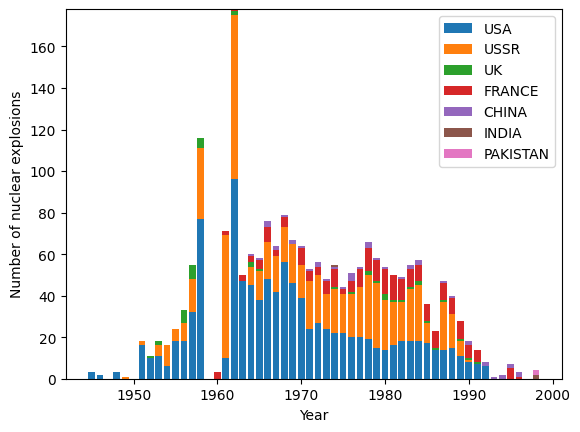

In [ ]:
countries = ['USA', 'USSR', 'UK', 'FRANCE', 'CHINA', 'INDIA', 'PAKISTAN']
bottom = np.zeros(len(explosions_by_country))
fig, ax = plt.subplots()
for country in countries:
    ax.bar(explosions_by_country.index, explosions_by_country[country],
            bottom=bottom, label=country)
    bottom += explosions_by_country[country].values

ax.set_xlabel('Year')
ax.set_ylabel('Number of nuclear explosions')
ax.legend()

In [ ]:
import geopandas

In [ ]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<Axes: >

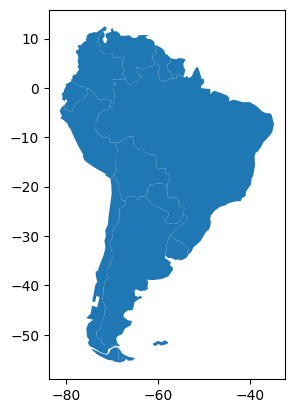

In [ ]:
world[world.continent=='South America'].plot()

<ipython-input-322-6efde575b4bd>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


(-198.0, 198.00000000000006, -60.0, 90.0)

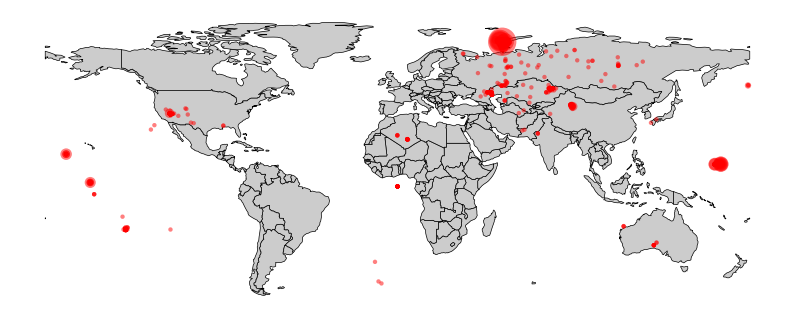

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(10,20))
world.plot(ax=ax, color="0.8", edgecolor='black', linewidth=0.5)

df['yield_estimate'] = df[['yield_lower','yield_upper']].mean(axis=1)
sizes = (df['yield_estimate'] / 120).clip(10)
ax.scatter(df['long'], df['lat'], s=sizes, fc='r', ec='none', alpha=0.5)
ax.set_ylim(-60, 90)
plt.axis('off')

In [ ]:
(df['yield_estimate'] / 120)

In [ ]:
# .clip limita os valores menores em 10
(df['yield_estimate'] / 120).clip(10)

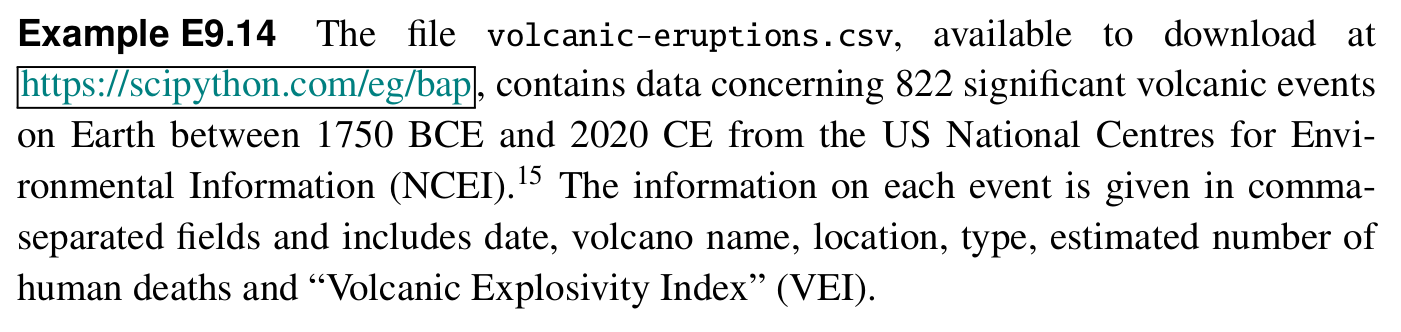

In [ ]:
!wget https://scipython.com/static/media/2/examples/E9/volcanic-eruptions.csv

--2024-03-12 23:47:00--  https://scipython.com/static/media/2/examples/E9/volcanic-eruptions.csv
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64901 (63K) [text/csv]
Saving to: ‘volcanic-eruptions.csv.1’

volcanic-eruptions. 100%[===================>]  63.38K  --.-KB/s    in 0.02s   

2024-03-12 23:47:00 (2.67 MB/s) - ‘volcanic-eruptions.csv.1’ saved [64901/64901]



In [ ]:
df = pd.read_csv('volcanic-eruptions.csv', index_col=0)

In [ ]:
df

,Year,Month,Day,Name,Location,Country,Latitude,Longitude,Elevation,Type,VEI,Deaths
1,-1750,NaN,NaN,Veniaminof,Alaska Peninsula,United States,56.170,-159.380,2507,Stratovolcano,6.0,NaN
2,-1645,NaN,NaN,Aniakchak,Alaska Peninsula,United States,56.880,-158.170,1341,Caldera,6.0,NaN
3,-1610,NaN,NaN,Santorini,Greece,Greece,36.404,25.396,329,Shield volcano,7.0,NaN
4,-1550,NaN,NaN,Redoubt,Alaska-SW,United States,60.480,-152.750,3108,Stratovolcano,NaN,NaN
5,-1460,NaN,NaN,Taupo,New Zealand,New Zealand,-38.820,176.000,760,Caldera,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
818,2019,5.0,7.0,Sinabung,Sumatra,Indonesia,3.170,98.392,2460,Stratovolcano,NaN,NaN
819,2019,6.0,26.0,Ulawun,New Britain-SW Pac,Papua New Guinea,-5.050,151.330,2334,Stratovolcano,NaN,NaN
820,2019,6.0,28.0,Manam,New Guinea-NE of,Papua New Guinea,-4.100,145.061,1807,Stratovolcano,4.0,NaN
821,2019,7.0,3.0,Stromboli,Italy,Italy,38.789,15.213,926,Stratovolcano,2.0,1.0


In [ ]:
df.loc[df['Deaths'].idxmax()]

Year                 450
Month                NaN
Day                  NaN
Name            Ilopango
Location     El Salvador
Country      El Salvador
Latitude          13.672
Longitude        -89.053
Elevation            450
Type             Caldera
VEI                  6.0
Deaths           30000.0
Name: 25, dtype: object

In [ ]:
def get_date(year, month, day):
    if year < 0:
       s_year = f'{-year} BCE'
    else:
       s_year = str(year)
    if pd.isnull(month):
       return s_year
    s_date = f'{int(month)}/{s_year}'
    if pd.isnull(day):
       return s_date
    return f'{int(day)}/{s_date}'

df['date'] = [get_date(year, month, day) for year, month, day in
                                    zip(df['Year'], df['Month'], df['Day'])]

In [ ]:
df

,Year,Month,Day,Name,Location,Country,Latitude,Longitude,Elevation,Type,VEI,Deaths,date
1,-1750,NaN,NaN,Veniaminof,Alaska Peninsula,United States,56.170,-159.380,2507,Stratovolcano,6.0,NaN,1750 BCE
2,-1645,NaN,NaN,Aniakchak,Alaska Peninsula,United States,56.880,-158.170,1341,Caldera,6.0,NaN,1645 BCE
3,-1610,NaN,NaN,Santorini,Greece,Greece,36.404,25.396,329,Shield volcano,7.0,NaN,1610 BCE
4,-1550,NaN,NaN,Redoubt,Alaska-SW,United States,60.480,-152.750,3108,Stratovolcano,NaN,NaN,1550 BCE
5,-1460,NaN,NaN,Taupo,New Zealand,New Zealand,-38.820,176.000,760,Caldera,6.0,NaN,1460 BCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,2019,5.0,7.0,Sinabung,Sumatra,Indonesia,3.170,98.392,2460,Stratovolcano,NaN,NaN,7/5/2019
819,2019,6.0,26.0,Ulawun,New Britain-SW Pac,Papua New Guinea,-5.050,151.330,2334,Stratovolcano,NaN,NaN,26/6/2019
820,2019,6.0,28.0,Manam,New Guinea-NE of,Papua New Guinea,-4.100,145.061,1807,Stratovolcano,4.0,NaN,28/6/2019
821,2019,7.0,3.0,Stromboli,Italy,Italy,38.789,15.213,926,Stratovolcano,2.0,1.0,3/7/2019


In [ ]:
df[pd.notnull(df['VEI'])].sort_values('VEI').tail(10)[['date', 'Name', 'Type', 'Country', 'VEI']]

,date,Name,Type,Country,VEI
29,653,Dakataua,Caldera,Papua New Guinea,6.0
25,450,Ilopango,Caldera,El Salvador,6.0
22,240,Ksudach,Stratovolcano,Russia,6.0
21,230,Taupo,Caldera,New Zealand,6.0
18,60,Bona-Churchill,Stratovolcano,United States,6.0
99,19/2/1600,Huaynaputina,Stratovolcano,Peru,6.0
1,1750 BCE,Veniaminof,Stratovolcano,United States,6.0
40,1000,Changbaishan,Stratovolcano,North Korea,7.0
218,10/4/1815,Tambora,Stratovolcano,Indonesia,7.0
3,1610 BCE,Santorini,Shield volcano,Greece,7.0


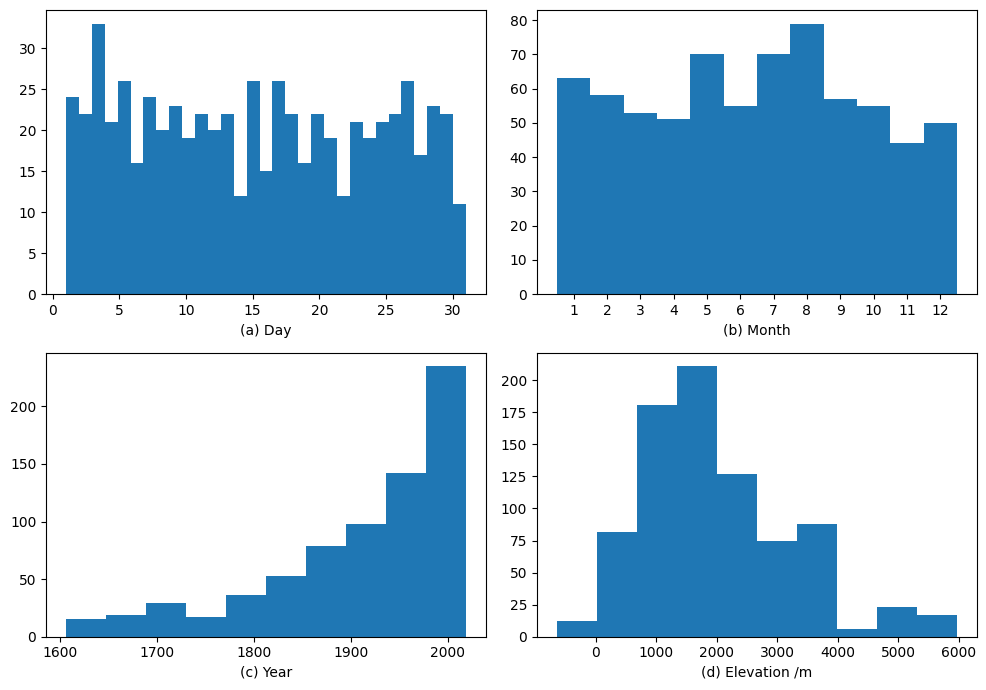

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
df['Day'].hist(bins=31, ax=axes[0][0], grid=False)
axes[0][0].set_xlabel('(a) Day')
df['Month'].hist(bins=np.arange(1, 14) - 0.5, ax=axes[0][1], grid=False)
axes[0][1].set_xticks(range(1, 13))
axes[0][1].set_xlabel('(b) Month')
df[df['Year']>1600]['Year'].hist(ax=axes[1][0], grid=False)
axes[1][0].set_xlabel('(c) Year')
df['Elevation'].hist(ax=axes[1][1], grid=False)
axes[1][1].set_xlabel('(d) Elevation /m')
plt.tight_layout()